### 1. Data Wrangling with Python: Activity 5, page 116

Generating Statistics from a CSV File Suppose you are working with the famous Boston housing price (from 1960) dataset. This dataset is famous in the machine learning community. Many regression problems can be formulated, and machine learning algorithms can be run on this dataset. You will do perform a basic data wrangling activity (including plotting some trends) on this dataset by reading it as a pandas DataFrame. Note The pandas function for reading a CSV file is read_csv. 

These steps will help you complete this activity:


Load the necessary libraries.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read in the Boston housing dataset (given as a .csv file) from the local directory.

In [10]:
df=pd.read_csv('Data/Boston.csv')

Check the first 10 records. 

In [11]:
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Find the total number of records. 

In [12]:
df.shape

(506, 15)

There are 506 records in total

Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT.

In [20]:
df1=df[['crim','zn','indus','rm','age','dis','rad','tax','ptratio','medv']]

Check the last seven records of the new DataFrame you just created. 

In [21]:
df1.tail(7)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,medv
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


Plot the histograms of all the variables (columns) in the new DataFrame.  Plot them all at once using a for loop. Try to add a unique title to a plot. 

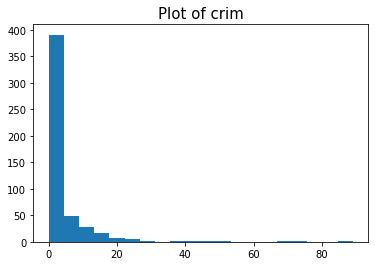

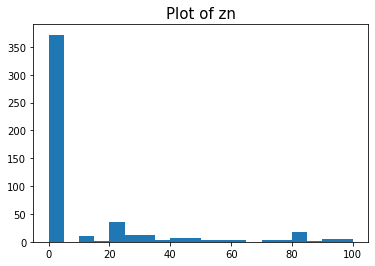

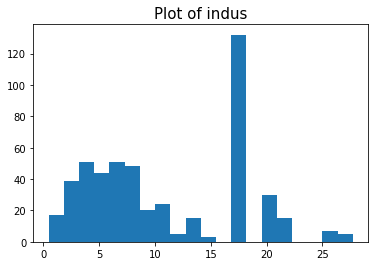

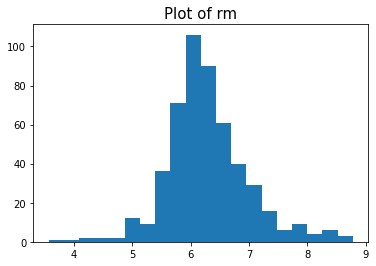

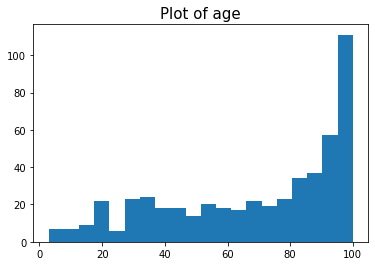

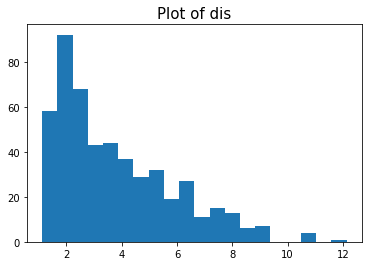

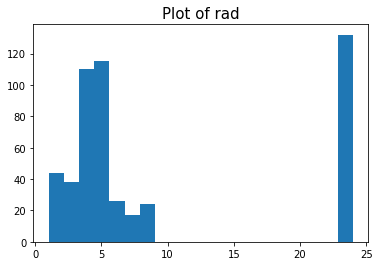

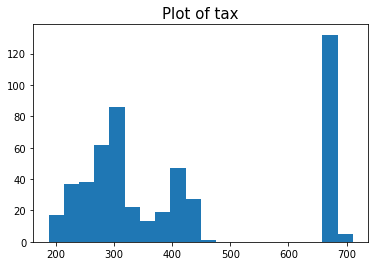

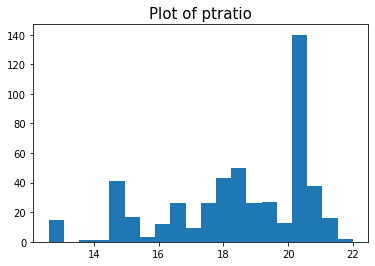

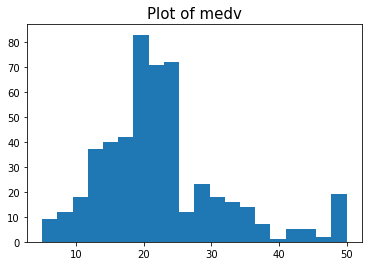

In [22]:
for c in df1.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(df1[c],bins=20)
    plt.show()

Create a scatter plot of crime rate versus price. 

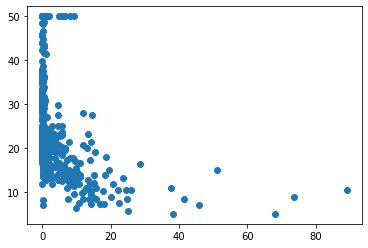

In [24]:
plt.scatter(df1['crim'],df1['medv'])
plt.show()

Plot using log10(crime) versus price. 

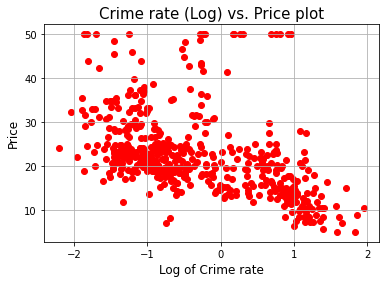

In [26]:
plt.scatter(np.log10(df1['crim']),df1['medv'],c='red')
plt.title("Crime rate (Log) vs. Price plot", fontsize=15)
plt.xlabel("Log of Crime rate",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.grid(True)
plt.show()

Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to five Boston employment centers.

In [27]:
df1['rm'].mean()

6.284634387351787

In [28]:
df1['age'].median()

77.5

In [29]:
df1['dis'].mean()

3.795042687747034

Calculate the the percentage of houses with a low price (< $20,000).

In [32]:
# Create a Pandas series and directly compare it with 20 
# You can do this because Pandas series is basically NumPy array and you have seen how to filter NumPy array 

low_price=df1['medv']<20 

# This creates a Boolean array of True, False 

print(low_price) 

# True = 1, False = 0, so now if you take an average of this NumPy array, you will know how many 1's are there. 
# That many houses are priced below 20,000. So that is the answer. 
# You can convert that into percentage by multiplying with 100 

pcnt=low_price.mean()*100 

print("\nPercentage of house with <20,000 price is: ",pcnt)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505     True
Name: medv, Length: 506, dtype: bool

Percentage of house with <20,000 price is:  41.50197628458498


### 2. Data Wrangling with Python: Activity 6, page 171

Working with the Adult Income Dataset (UCI) In this activity, you will work with the Adult Income Dataset from the UCI machine learning portal. The Adult Income dataset has been used in many machine learning papers that address classification problems. You will read the data from a CSV file into a pandas DataFrame and do some practice on the advanced data wrangling you learned about in this chapter. The aim of this activity is to practice various advanced pandas DataFrame operations, for example, for subsetting, applying user-defined functions, summary statistics, visualizations, boolean indexing, group by, and outlier detection on a real-life dataset. We have the data downloaded as a CSV file on the disk for your ease. However, it is recommended to practice data downloading on your own so that you are familiar with the process. Here is the URL for the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/. Here is the URL for the description of the dataset and the variables: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names. 

These are the steps that will help you solve this activity: 

Load the necessary libraries. 

In [ ]:
#Already loaded at the top

Read the adult income dataset from the following URL: https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Chapter04/Activity06/. 


In [48]:
AdultInc = pd.read_csv('Data/adult.csv') 
AdultInc.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Create a script that will read a text file line by line. 

In [55]:
names = []
with open('Data/adult_names.txt', 'r') as t:      
    for line in t:                                  
        t.readline()                                
        var=line.split(":")[0]                      
        names.append(var)        

names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

Add a name of Income for the response variable to the dataset. 

In [56]:
names.append('Income')
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [57]:
# Reading the csv file again with column with list of names as column

AdInc2 = pd.read_csv('Data/adult.csv', names=names)
AdInc2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Find the missing values. 

In [58]:
AdInc2.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

There are no missing values in the dataframe.

Create a DataFrame with only age, education, and occupation by using subsetting. 

In [59]:
AdInc3 = AdInc2[['age', 'education', 'occupation']]
AdInc3.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


Plot a histogram of age with a bin size of 20. 

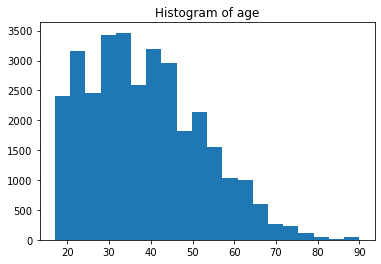

In [60]:
plt.title("Histogram of age",fontsize=12)  
plt.hist(AdInc3['age'], bins=20)    
plt.show()   

Create a function to strip the whitespace characters. 

In [61]:
def strip_wtsp(s): return s.strip()

Use the apply method to apply this function to all the columns with string values, create a new column, copy the values from this new column to the old column, and drop the new column.

In [62]:
def strip_column(var):                       
    AdInc3['newcolumn'] = var.apply(strip_wtsp)
    AdInc3.var = AdInc3['newcolumn']    
    
    return

strip_column(AdInc3['education'])                     # Strip whitespace from 'education' column
strip_column(AdInc3['occupation'])                    # Strip whitespace from 'occupation' column

AdInc3 = AdInc3.drop(['newcolumn'], axis=1)

AdInc3.head()

<ipython-input-62-e7e8eac07dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AdInc3['newcolumn'] = var.apply(strip_wtsp)


,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


Find the number of people who are aged between 30 and 50. 

In [65]:
Count = AdInc3[(30 < AdInc3['age']) & (AdInc3['age'] < 50)].count()['age']
print('There are ', Count, ' people aged between 30 and 50.')

There are  14927  people aged between 30 and 50.


Group the records based on age and education to find how the mean age is distributed. 

In [66]:
AdInc4 = AdInc3.groupby(['education'])['age'].mean()
AdInc4

education
 10th            37.429796
 11th            32.355745
 12th            32.000000
 1st-4th         46.142857
 5th-6th         42.885886
 7th-8th         48.445820
 9th             41.060311
 Assoc-acdm      37.381443
 Assoc-voc       38.553546
 Bachelors       38.904949
 Doctorate       47.702179
 HS-grad         38.974479
 Masters         44.049913
 Preschool       42.764706
 Prof-school     44.746528
 Some-college    35.756275
Name: age, dtype: float64

Group by occupation and show the summary statistics of age. Find which profession has the oldest workers on average and which profession has its largest share of the workforce above the 75th percentile. 

In [67]:
AdInc3.groupby(['occupation'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


Use subset and groupby to find outliers. 

In [68]:
occup_stats= AdInc3.groupby( 'occupation').describe()['age']

Plot the values on a bar chart. 

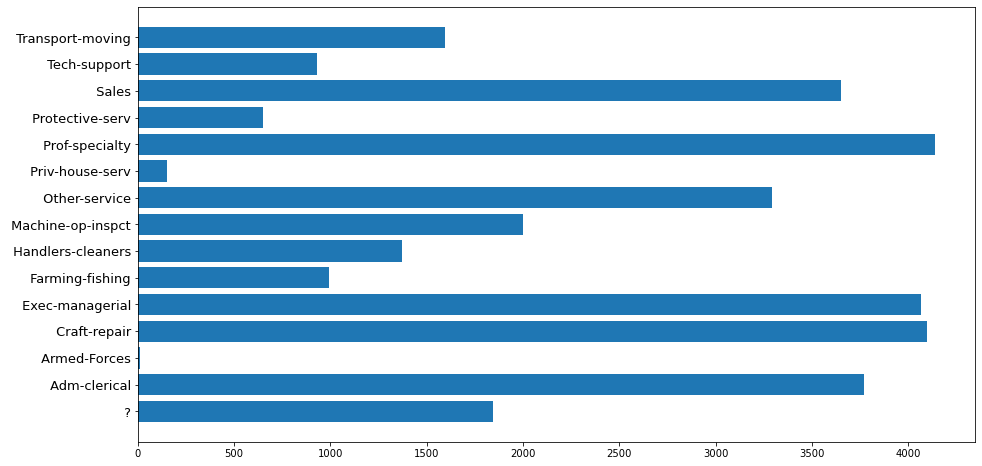

In [70]:
plt.figure(figsize=(15,8)) 
plt.barh(y=occup_stats.index,width=occup_stats['count']) 
plt.yticks(fontsize=13) 
plt.show()

Merge the data using common keys.

In [73]:
AdInc5 = AdInc2[['age', 'education', 'occupation']].sample(5, random_state=101)
AdInc5.head()

,age,education,occupation
22357,51,HS-grad,Machine-op-inspct
26009,19,11th,Sales
20734,40,HS-grad,Exec-managerial
17695,17,10th,Handlers-cleaners
27908,61,7th-8th,Craft-repair


In [72]:
AdInc6 = AdInc2[['age', 'marital-status', 'native-country']].sample(5, random_state=101)
AdInc6.head()

,age,marital-status,native-country
22357,51,Married-civ-spouse,United-States
26009,19,Never-married,United-States
20734,40,Married-civ-spouse,United-States
17695,17,Never-married,United-States
27908,61,Married-civ-spouse,Poland


In [74]:
AdInc_merge = pd.merge(AdInc5, AdInc6, on='age', how='inner') 
AdInc_merge

,age,education,occupation,marital-status,native-country
0,51,HS-grad,Machine-op-inspct,Married-civ-spouse,United-States
1,19,11th,Sales,Never-married,United-States
2,40,HS-grad,Exec-managerial,Married-civ-spouse,United-States
3,17,10th,Handlers-cleaners,Never-married,United-States
4,61,7th-8th,Craft-repair,Married-civ-spouse,Poland



### 3. Create a series and practice basic arithmetic steps

a. Series 1 = 7.3, -2.5, 3.4, 1.5
i. Index = ‘a’, ‘c’, ‘d’, ‘e’

In [78]:
data1 = [7.3, -2.5, 3.4, 1.5]
index1 = ['a', 'c', 'd', 'e']

series1 = pd.Series(data=data1, index=index1)
print(series1)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64


b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’

In [79]:
data2 = [-2.1, 3.6, -1.5, 4, 3.1]
index2 = ['a', 'c', 'e', 'f', 'g']

series2 = pd.Series(data=data2, index=index2)
print(series2)

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


c. Add Series 1 and Series 2 together and print the results

In [80]:
series_sum = series1 + series2
print(series_sum)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


d. Subtract Series 1 from Series 2 and print the results

In [81]:
series_substract = series2 - series1
print(series_substract)

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64
